In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/day38-random-imputation/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
print(X.shape)
print(y.shape)

(891, 2)
(891,)


Train-Test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [11]:
X_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0


In [12]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


Replacing NaN values of `Age` column with Random imputation

In [13]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

<ipython-input-13-c2348534f728>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
<ipython-input-13-c2348534f728>:2

In [14]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([29.  , 70.  , 19.  ,  9.  , 50.  ,  2.  , 21.  ,  2.  , 28.  ,
       18.  , 29.  ,  1.  , 41.  , 17.  , 22.  , 16.  ,  5.  , 34.  ,
       28.  , 20.  , 21.  , 36.  , 23.  , 24.  , 11.  , 18.  , 27.  ,
       39.  , 31.  ,  7.  , 36.  , 25.  , 48.  , 70.5 , 20.  ,  3.  ,
        9.  , 31.  , 16.  , 21.  , 54.  , 19.  ,  2.  , 12.  , 29.  ,
       62.  , 16.  , 22.  , 16.  ,  2.  , 18.  , 19.  , 25.  , 18.  ,
       36.  , 48.  , 43.  , 25.  , 20.  , 58.  ,  1.  , 42.  , 32.  ,
       32.  , 42.  , 31.  ,  0.75,  4.  , 25.  , 27.  , 27.  , 24.  ,
       30.  , 39.  , 28.  ,  9.  , 32.5 , 26.  , 34.  , 29.  , 36.  ,
       47.  , 33.  , 22.  , 16.  , 17.  , 44.  , 26.  , 36.  , 22.  ,
       21.  , 16.  , 31.  , 29.  , 24.  , 34.  , 29.  , 48.  , 41.  ,
       61.  , 23.  , 45.  , 71.  , 56.  , 36.  , 33.  , 34.  , 33.  ,
       34.  , 24.  , 30.  , 18.  , 28.  , 30.  , 25.  , 32.  , 50.  ,
       32.  , 30.  , 49.  , 23.  , 25.  , 40.  , 21.  , 24.  , 14.  ,
        5.  , 30.  ,

In [15]:
X_train['Age'].isnull().sum()

148

In [16]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,23.0
493,71.0,49.5042,71.0
527,NaN,221.7792,29.0


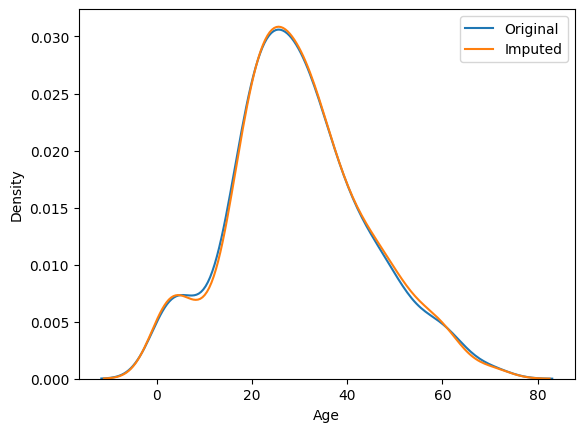

In [17]:
sns.kdeplot(X_train['Age'], label='Original', fill=False)
sns.kdeplot(X_train['Age_imputed'], label='Imputed', fill=False)

plt.legend()
plt.show()

In [18]:
print('Original variable variance : ', X_train['Age'].var())
print('Variance after random imputation : ', X_train['Age_imputed'].var())

Original variable variance :  204.3495133904614
Variance after random imputation :  204.2097641018346


In [19]:
# Covariance
X_train.cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,54.444340
Age_imputed,204.349513,54.444340,204.209764


<Axes: >

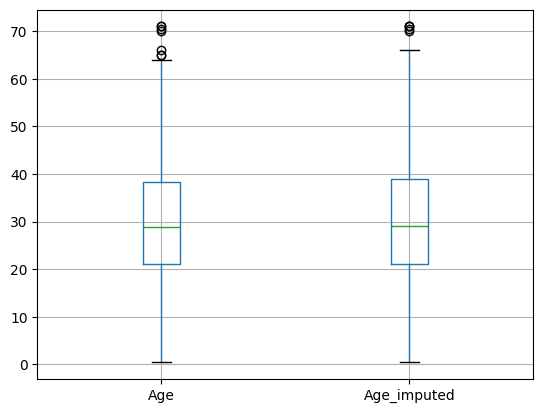

In [20]:
# Outliers won't be affected by this Random imputation technique
X_train[['Age', 'Age_imputed']].boxplot()

In [21]:
observation = X_train.iloc[0]  # Selecting the first row as an example

# Ensure observation['Fare'] is not NaN before using it
if not pd.isna(observation['Fare']):
    sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
else:
    sampled_value = X_train['Age'].dropna().sample(1)  # Default random sampling


Working with Categorical data

In [22]:
data = pd.read_csv('/content/drive/MyDrive/day38-random-imputation/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [23]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [24]:
data.isnull().mean() * 100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [25]:
X = data
y = data['SalePrice']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [28]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
683,TA,TA,285000,TA,TA
121,NaN,TA,100000,TA,NaN
582,NaN,NaN,118500,NaN,NaN
1049,NaN,TA,84900,TA,NaN
1132,NaN,Fa,117500,Fa,NaN


Replacing NaN values with Random imputation

In [29]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-29-f5eeca8d3074>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipyt

In [30]:
# 'GarageQual' column

temp = pd.concat(
  [
      X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
      X_train['GarageQual_imputed'].value_counts()/len(X_train)
  ], axis=1)

temp.columns = ['original', 'imputed']

In [31]:
temp*100

,original,imputed
TA,95.104261,95.034247
Fa,3.717135,3.767123
Gd,0.997280,0.941781
Po,0.090662,0.085616
Ex,0.090662,0.171233


In [32]:
# 'FireplaceQu' column

temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.644220
TA,0.412439,0.542088
Fa,0.040917,0.056117
Po,0.027823,0.037037
Ex,0.024550,0.031425


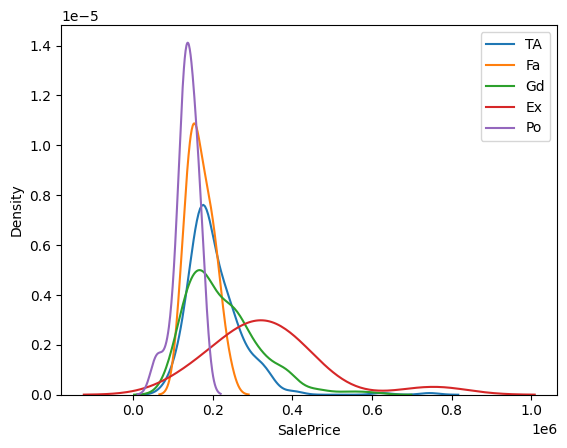

In [33]:
# Distribution before imputation
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], label=category, fill=False)

plt.legend()
plt.show()

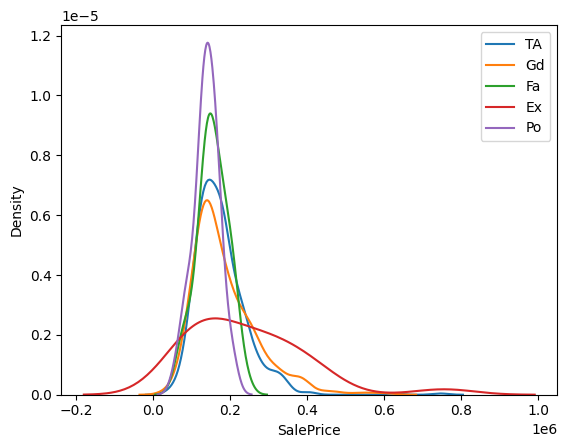

In [34]:
# Distribution after imputation
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], label=category, fill=False)

plt.legend()
plt.show()